In [1]:
import testing as tst
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pickle import load, dump 
import math
import datetime
import calplot

# Choosing the best and the worst network

In [2]:
val_data_archivo='../../01_weather_data/02_cleaned_data/esoru_night_angles_2.csv'
validation=pd.read_csv(val_data_archivo,index_col=0,parse_dates=True)

In [3]:
tabnames=[]
for i in range(1,10,1):
    for o in range (1,4,1):
        tabnames.append(int(str(i)+str(o)))
tabnames=pd.Series(tabnames)

In [4]:
metricas=['model','E_dmae','E_dmape','mae_de_día_promedio']
hpt=pd.read_csv('4metricas_tabla_all.csv')[metricas]
# hpt=hpt.columns(['model','E_dmae','E_dmape','mae_Ig'])
hpt=pd.concat([tabnames,hpt],axis=1)
hpt=hpt.set_index(hpt.mae_de_día_promedio)
hpt

,0,model,E_dmae,E_dmape,mae_de_día_promedio
mae_de_día_promedio,,,,,
93.439908,11,train_seasonal_layers_3_3_1_out_s_6in_s_6_lr_1...,667.787027,11.624583,93.439908
92.157869,12,train_seasonal_layers_3_3_1_out_s_6in_s_6_lr_1...,645.520003,11.362791,92.157869
98.008985,13,train_seasonal_layers_3_3_1_out_s_6in_s_6_lr_1...,634.197143,11.100360,98.008985
85.564206,21,train_seasonal_layers_3_3_1_out_s_6in_s_6_lr_1...,590.860541,10.648727,85.564206
82.062640,22,train_seasonal_layers_3_3_1_out_s_6in_s_6_lr_1...,546.065838,10.179817,82.062640
84.311044,23,train_seasonal_layers_3_3_1_out_s_6in_s_6_lr_1...,573.741509,10.444551,84.311044
80.582398,31,train_seasonal_layers_3_3_1_out_s_6in_s_6_lr_0...,544.220520,10.045735,80.582398
82.727567,32,train_seasonal_layers_3_3_1_out_s_6in_s_6_lr_0...,552.727759,10.418220,82.727567
82.865735,33,train_seasonal_layers_3_3_1_out_s_6in_s_6_lr_0...,554.240297,10.282335,82.865735


In [5]:
# hpt.tiempo_train=pd.to_timedelta(hpt.tiempo_train)
# hpt=hpt.set_index(hpt.mae_de_dia_promedio)
hpt=hpt.sort_index()
# hpt.astype(int)
# hpt.mae_de_dia_promedio=hpt.mae_de_dia_promedio.astype(float)
# fig, ax=plt.subplots(figsize=(10,15))
# ax.plot(hpt.dif_energia_wh,'b.')
hpt.set_index(hpt.model)

,0,model,E_dmae,E_dmape,mae_de_día_promedio
model,,,,,
train_seasonal_layers_2_2_1_out_s_6in_s_6_lr_0.0001_Global_BS12.h5,62,train_seasonal_layers_2_2_1_out_s_6in_s_6_lr_0...,539.512341,10.175225,80.135618
train_seasonal_layers_3_3_1_out_s_6in_s_6_lr_0.0001_Global_BS6.h5,31,train_seasonal_layers_3_3_1_out_s_6in_s_6_lr_0...,544.220520,10.045735,80.582398
train_seasonal_layers_1_1_1_out_s_6in_s_6_lr_0.0001_Global_BS24.h5,93,train_seasonal_layers_1_1_1_out_s_6in_s_6_lr_0...,549.184028,10.156253,81.024751
train_seasonal_layers_2_2_1_out_s_6in_s_6_lr_0.0001_Global_BS6.h5,61,train_seasonal_layers_2_2_1_out_s_6in_s_6_lr_0...,554.310827,10.362297,81.326399
train_seasonal_layers_1_1_1_out_s_6in_s_6_lr_0.0001_Global_BS12.h5,92,train_seasonal_layers_1_1_1_out_s_6in_s_6_lr_0...,537.940347,10.092594,81.528066
train_seasonal_layers_2_2_1_out_s_6in_s_6_lr_0.0001_Global_BS24.h5,63,train_seasonal_layers_2_2_1_out_s_6in_s_6_lr_0...,552.249958,10.264829,81.551407
train_seasonal_layers_3_3_1_out_s_6in_s_6_lr_1e-05_Global_BS12.h5,22,train_seasonal_layers_3_3_1_out_s_6in_s_6_lr_1...,546.065838,10.179817,82.062640
train_seasonal_layers_2_2_1_out_s_6in_s_6_lr_1e-05_Global_BS6.h5,51,train_seasonal_layers_2_2_1_out_s_6in_s_6_lr_1...,543.090705,10.191902,82.646980
train_seasonal_layers_3_3_1_out_s_6in_s_6_lr_0.0001_Global_BS12.h5,32,train_seasonal_layers_3_3_1_out_s_6in_s_6_lr_0...,552.727759,10.418220,82.727567


## Worst network

In [6]:
yearly_w,daily_w,hourly_w=tst.dfmetricas(pd.read_csv('73.csv',index_col=0,parse_dates=True),validation,'train_seasonal_layers_3_3_1_out_s_6in_s_6_lr_1e-07_Global_BS24.h5')

Text(0.5, 1.0, 'Worst_architecture daily mae')

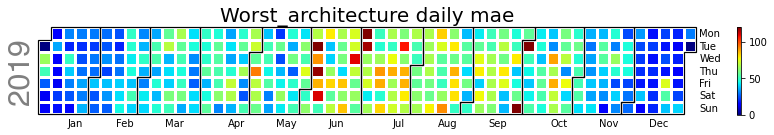

In [7]:
calplot.calplot(daily_w['mae'],cmap='jet',how='mean',vmin=0,vmax=120,edgecolor='black',linewidth=1.2)
plt.title('Worst_architecture daily mae',fontsize=20) #vmax=230

### Worst_day worst network

In [8]:
daily_w.mae.idxmax()

Timestamp('2019-10-01 00:00:00', freq='D')

mae_del_dia: 145.87081478638117


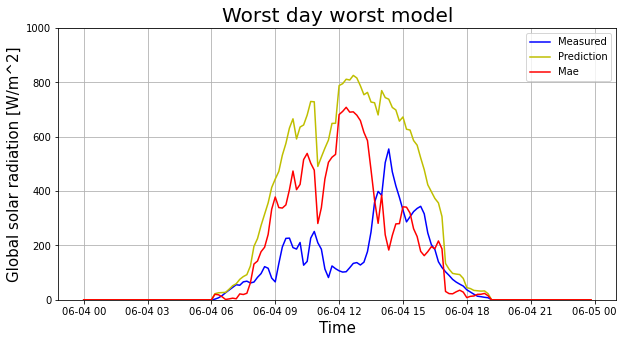

In [9]:
fecha='2019-06-04'
Title='Worst day worst model'
fig, ax=plt.subplots(figsize=(10,5))
ax.plot(hourly_w.Global[fecha],'b-',label='Measured')
ax.plot(hourly_w.prediccion[fecha],'y-',label='Prediction')
ax.plot(hourly_w.mae[fecha],'r-',label='Mae')
ax.legend()

ax.grid()
ax.set_ylim(0,1000)

plt.title(Title,fontsize=20)
ax.set_xlabel('Time',fontsize=15)
ax.set_ylabel('Global solar radiation [W/m^2]',fontsize=15)
print('mae_del_dia:',daily_w.mae.loc[fecha])
# plt.savefig('../../../Tesis_repo/figures/wdwn.png')

### The best day 

mae_del_dia: 16.495543081495498


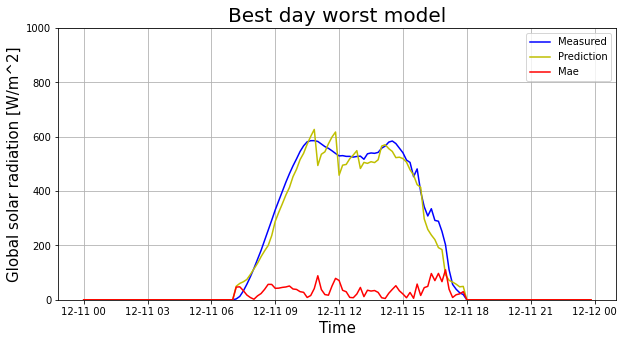

In [10]:
fecha='2019-12-11'
Title='Best day worst model'
fig, ax=plt.subplots(figsize=(10,5))
ax.plot(hourly_w.Global[fecha],'b-',label='Measured')
ax.plot(hourly_w.prediccion[fecha],'y-',label='Prediction')
ax.plot(hourly_w.mae[fecha],'r-',label='Mae')

ax.legend()
ax.grid()
ax.set_ylim(0,1000)
plt.title(Title,fontsize=20)
ax.set_xlabel('Time',fontsize=15)
ax.set_ylabel('Global solar radiation [W/m^2]',fontsize=15)
print('mae_del_dia:',daily_w.mae.loc[fecha])
# plt.savefig('../../../Tesis_repo/figures/bdwn.png')

# Best architecture

In [11]:
yearly_b2,daily_b2,hourly_b2=tst.dfmetricas(pd.read_csv('62.csv',index_col=0,parse_dates=True),validation,'train_seasonal_layers_1_1_1_out_s_6in_s_6_lr_0.0001_Global_BS24.h5')
tablita=['model','E_dmae','E_dmape','mae_Ig']

Text(0.5, 1.0, 'Best_architecture daily mae')

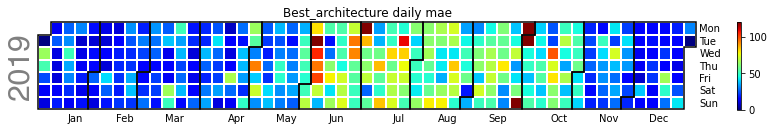

In [12]:
calplot.calplot(daily_b2['mae'],cmap='jet',how='mean',vmin=0,vmax=120,edgecolor='black',linewidth=1.5)
plt.title('Best_architecture daily mae')
# plt.savefig('../../../Tesis_repo/figures/calplot_mae_w.png')

### Worst day best network

In [13]:
daily_b2.mae.idxmax()

Timestamp('2019-06-04 00:00:00', freq='D')

mae_del_dia: 175.13087335774634


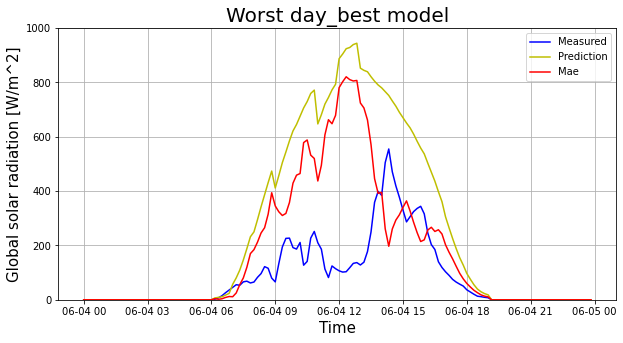

In [14]:
fecha='2019-06-04'
Title='Worst day_best model'
fig, ax=plt.subplots(figsize=(10,5))
ax.plot(hourly_b2.Global[fecha],'b-',label='Measured')
ax.plot(hourly_b2.prediccion[fecha],'y-',label='Prediction')
ax.plot(hourly_b2.mae[fecha],'r-',label='Mae')

ax.grid()
ax.legend()
ax.set_ylim(0,1000)
plt.title(Title,fontsize=20)
ax.set_xlabel('Time',fontsize=15)
ax.set_ylabel('Global solar radiation [W/m^2]',fontsize=15)
print('mae_del_dia:',daily_b2.mae.loc[fecha])
# plt.savefig('../../../Tesis_repo/chapters/ch4_study_case_Temixco/figures/wdbn.png')
# plt.savefig('../../../Tesis_repo/figures/wdbn.png')

### Best day best network

mae_del_dia: 7.15249186982049


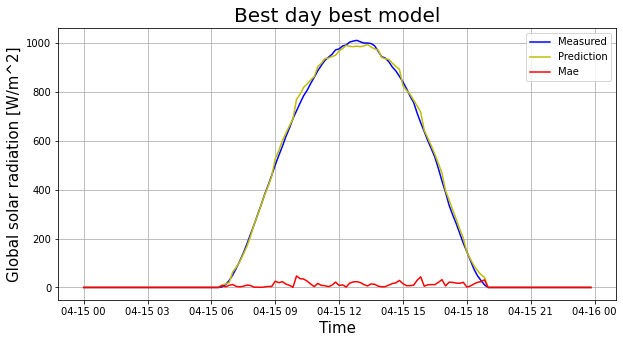

In [15]:
# fecha='2019-12-28'
fecha='2019-04-15'
Title='Best day best model'
fig, ax=plt.subplots(figsize=(10,5))
ax.plot(hourly_b2.Global[fecha],'b-',label='Measured')
ax.plot(hourly_b2.prediccion[fecha],'y-',label='Prediction')
ax.plot(hourly_b2.mae[fecha],'r-',label='Mae')

ax.grid()
ax.legend()
plt.title(Title,fontsize=20)
ax.set_xlabel('Time',fontsize=15)
ax.set_ylabel('Global solar radiation [W/m^2]',fontsize=15)
print('mae_del_dia:',daily_b2.mae.loc[fecha])
# plt.savefig('../../../Tesis_repo/figures/bdbn.png')

Text(0.5, 1.0, 'Daily total radiation energy [wh/m2]')

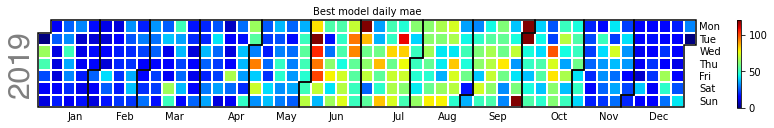

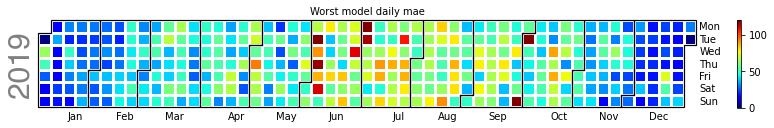

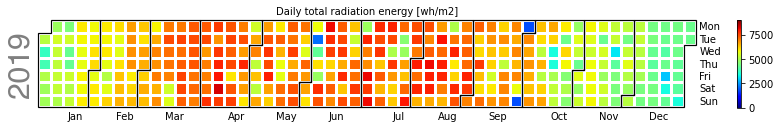

In [16]:
calplot.calplot(daily_b2['mae'],cmap='jet',how='mean',vmin=0,vmax=120,edgecolor='black',linewidth=1.5)
plt.title('Best model daily mae',fontsize=10)
# plt.savefig('../../../Tesis_repo/figures/bnmae.png')
calplot.calplot(daily_w['mae'],cmap='jet',how='mean',vmin=0,vmax=120,edgecolor='black',linewidth=1.2)
plt.title('Worst model daily mae',fontsize=10)
# plt.savefig('../../../Tesis_repo/figures/wnmae.png')
calplot.calplot(daily_w['E_d'],cmap='jet',how='mean',vmin=0,vmax=1000*9,edgecolor='black',linewidth=1.2)
plt.title('Daily total radiation energy [wh/m2]',fontsize=10)
# plt.savefig('../../../Tesis_repo/figures/day_rad.png')


In [17]:
bnw=pd.concat((yearly_b2,yearly_w),axis=0)[tablita]
bnw.to_csv('../../../Tesis_repo/best_and_worse.csv')
bnw

,model,E_dmae,E_dmape,mae_Ig
tiempo,,,,
2019-12-31,train_seasonal_layers_1_1_1_out_s_6in_s_6_lr_0...,544.046775,10.241327,80.496426
2019-12-31,train_seasonal_layers_3_3_1_out_s_6in_s_6_lr_1...,725.426189,12.329333,98.848223


In [18]:
def typical_error_day(dfrad):
    dfmingroup=dfrad.groupby(['minutodia',pd.Grouper(freq='1H')]).mean()
    dfmindia=dfmingroup.groupby(pd.Grouper(level='minutodia',axis=0)).mean()
    meanaltura=dfmindia.alturasolar.mean()
    meandiay=dfmindia.me.mean()
    return(dfmindia.mae,dfmindia.me)

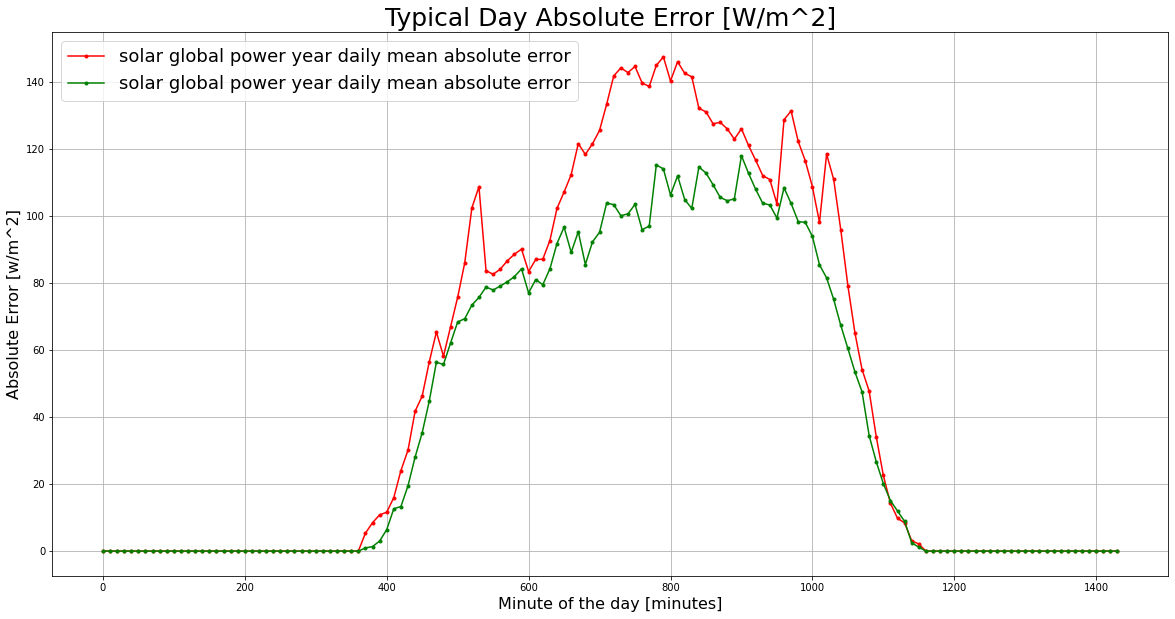

In [19]:
worst_mae,worst_me=typical_error_day(hourly_w)
best_mae,best_me=typical_error_day(hourly_b2)

fig, ax= plt.subplots(figsize=(20,10))
ax.plot(worst_mae,'r.-',label='solar global power year daily mean absolute error')
ax.plot(best_mae,'g.-',label='solar global power year daily mean absolute error')

plt.title('Typical Day Absolute Error [W/m^2]',fontsize=25)
ax.legend(fontsize=18)
ax.set_ylabel('Absolute Error [w/m^2]',fontsize=16)
ax.set_xlabel('Minute of the day [minutes]',fontsize=16)
plt.grid()

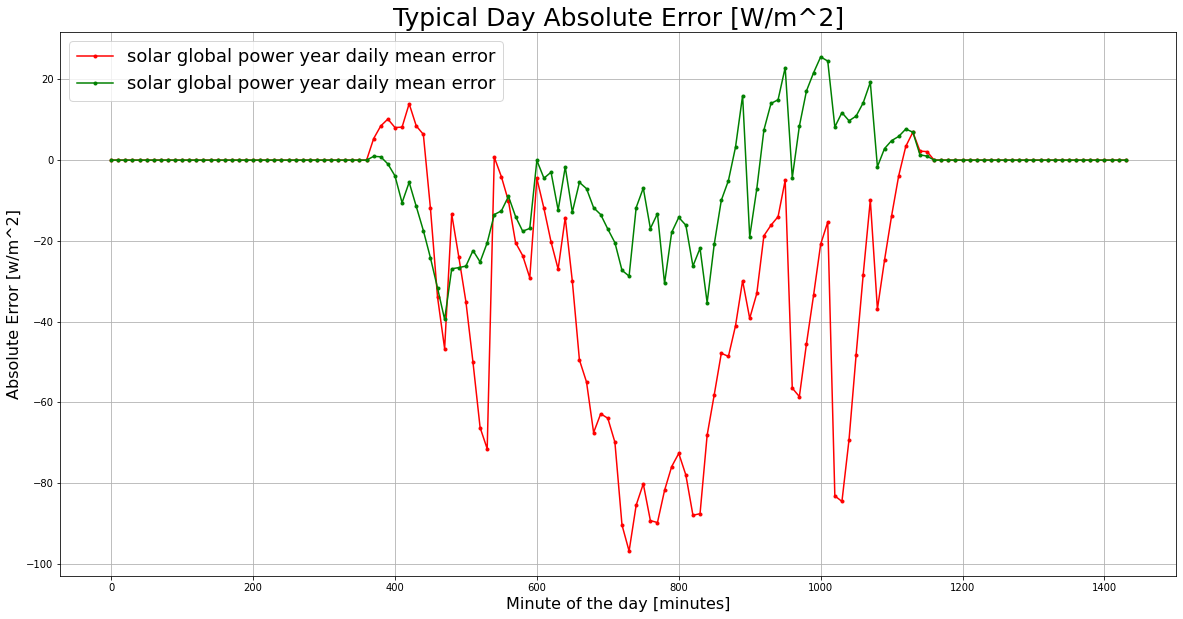

In [20]:
fig, ax= plt.subplots(figsize=(20,10))

ax.plot(worst_me,'r.-',label='solar global power year daily mean error')
ax.plot(best_me,'g.-',label='solar global power year daily mean error')

plt.title('Typical Day Absolute Error [W/m^2]',fontsize=25)
ax.legend(fontsize=18)
ax.set_ylabel('Absolute Error [w/m^2]',fontsize=16)
ax.set_xlabel('Minute of the day [minutes]',fontsize=16)
plt.grid()
# print('diferencia [w/m2] promedio anual:',meandiay) 